In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# UDPNY 2018 - _phase #2_
# _1.2 edition - 06.21.18_
## Map of gentrification for the Greater New York area

This notebook is the first phase of the project: applying the [Urban Displacement Project (UDP)](http://www.urbandisplacement.org/) methodology, developed for the Bay Area, to the New York Metropolitan area. 

This code defines the _**8 displacement typologies**_ and assignes each CT to a typology. 

- [UDP's methodology / displacement typollogies](http://www.urbandisplacement.org/sites/default/files/images/methdology_summary.pdf)

In [2]:
df_empd15 = pd.read_csv('empd15.csv')

In [3]:
df_tod = pd.read_csv('TOD.csv')

In [4]:
df_aram = pd.read_stata("UDP_NYC_Variables.dta")

In [5]:
df_ct_90 = pd.read_csv('09_1990_variables.csv')

In [6]:
df_ct_00 = pd.read_csv('09_2000_variables.csv')

In [7]:
df_ct_10 = pd.read_csv('09_2010_variables.csv')

In [8]:
df_ct_16 = pd.read_csv('09_2016_variables.csv')

In [9]:
df_ny_90 = pd.read_csv('36_1990_variables.csv')

In [10]:
df_ny_00 = pd.read_csv('36_2000_variables.csv')

In [11]:
df_ny_10 = pd.read_csv('36_2010_variables.csv')

In [12]:
df_ny_16 = pd.read_csv('36_2016_variables.csv')

In [13]:
df_nj_90 = pd.read_csv('34_1990_variables.csv')

In [14]:
df_nj_10 = pd.read_csv('34_2010_variables.csv')

In [15]:
df_nj_00 = pd.read_csv('34_2000_variables.csv')

In [16]:
df_nj_16 = pd.read_csv('34_2016_variables.csv')

In [17]:
df_ct = df_ct_90.merge(df_ct_00, on = 'GEOid2')

In [18]:
df_ct = df_ct.merge(df_ct_10, on = 'GEOid2')

In [19]:
df_ct = df_ct.merge(df_ct_16, on = 'GEOid2')

In [20]:
df_ny = df_ny_90.merge(df_ny_00, on = 'GEOid2')

In [21]:
df_ny = df_ny.merge(df_ny_10, on = 'GEOid2')

In [22]:
df_ny = df_ny.merge(df_ny_16, on = 'GEOid2')

In [23]:
df_nj = df_nj_90.merge(df_nj_00, on = 'GEOid2')

In [24]:
df_nj = df_nj.merge(df_nj_10, on = 'GEOid2')

In [25]:
df_nj = df_nj.merge(df_nj_16, on = 'GEOid2')

In [26]:
df_ct['hi_mig_16'] = 0
df_ct['vhi_mig_16'] = 0
df_ct['hi_mig_16_moe'] = 0
df_ct['vhi_mig_16_moe'] = 0
df_ct['hi_mig_10'] = 0
df_ct['vhi_mig_10'] = 0
df_ct['hi_mig_10_moe'] = 0
df_ct['vhi_mig_10_moe'] = 0

In [27]:
df_ny = df_ny.sort_index(axis=1)
df_ct = df_ct.sort_index(axis=1)
df_nj = df_nj.sort_index(axis=1)

In [28]:
df_ny = df_ny.drop(columns = ['NAME_x', 'NAME_y', 'county_x', 'county_y', 'state_x', 'state_y'])

In [29]:
df_ct = df_ct.drop(columns = ['NAME_x', 'NAME_y', 'county_x', 'county_y', 'state_x', 'state_y'])

In [30]:
df_nj = df_nj.drop(columns = ['NAME_x', 'NAME_y', 'county_x', 'county_y', 'state_x', 'state_y'])

In [31]:
df_ny = df_ny.reset_index().drop(columns='index')
df_nj = df_nj.reset_index().drop(columns='index')
df_ct = df_ct.reset_index().drop(columns='index')

In [32]:
data = pd.concat([df_nj, df_ny, df_ct],axis=0)

In [33]:
data = data.reset_index().drop(columns='index')

In [34]:
data['TOD'] = data.merge(df_tod, how='inner', left_on='GEOid2',right_on='GEOID').TOD

In [35]:
data = data.merge(df_empd15, how='inner', on='GEOid2')

In [36]:
data = data.drop('Unnamed: 0',axis=1)

In [37]:
df_aram['GEOid2'] = df_aram['GEOid2'].apply(lambda x: int(x))

In [38]:
df_compare = df_aram.merge(data, how='inner', on='GEOid2')

In [39]:
binsize=50

In [40]:
df_compare = df_compare[(df_compare.vli2000!=0)&(df_compare.li2000!=0)&(df_compare.mi2000!=0)&
                        (df_compare.hmi2000!=0)&(df_compare.hi2000!=0)&(df_compare.vhi2000!=0)]
df_compare = df_compare[(df_compare.vli1990!=0)&(df_compare.li1990!=0)&(df_compare.mi1990!=0)&
                        (df_compare.hmi1990!=0)&(df_compare.hi1990!=0)&(df_compare.vhi1990!=0)]
df_compare = df_compare[(df_compare.vli2016!=0)&(df_compare.li2016!=0)&(df_compare.mi2016!=0)&
                        (df_compare.hmi2016!=0)&(df_compare.hi2016!=0)&(df_compare.vhi2016!=0)]

(-400, 200)

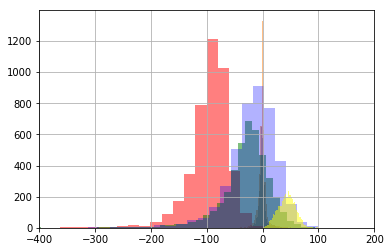

In [41]:
(((df_compare['vli2000']-df_compare['vli_00']).divide(df_compare['vli2000']))*100).hist(alpha=0.5, bins=binsize)
(((df_compare['li2000']-df_compare['li_00']).divide(df_compare['li2000']))*100).hist(alpha=0.5, bins=binsize)
(((df_compare['mi2000']-df_compare['mi_00']).divide(df_compare['mi2000']))*100).hist(alpha=0.5, bins=binsize,color='red')
(((df_compare['hmi2000']-df_compare['mhi_00']).divide(df_compare['hmi2000']))*100).hist(alpha=0.5, bins=binsize, color='green')
(((df_compare['hi2000']-df_compare['hi_00']).divide(df_compare['hi2000']))*100).hist(alpha=0.3, bins=binsize, color='blue')
(((df_compare['vhi2000']-df_compare['vhi_00']).divide(df_compare['vhi2000']))*100).hist(alpha=0.5, bins=binsize, color='yellow')
pl.xlim([-400,200])

(-400, 200)

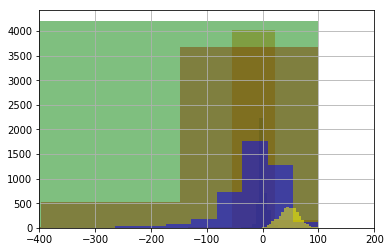

In [42]:
(((df_compare['vli1990']-df_compare['vli_90']).divide(df_compare['vli1990']))*100).hist(alpha=0.5, bins=binsize)
(((df_compare['li1990']-df_compare['li_90']).divide(df_compare['li1990']))*100).hist(alpha=0.5,bins=binsize)
(((df_compare['mi1990']-df_compare['mi_90']).divide(df_compare['mi1990']))*100).hist(alpha=0.5, bins=400, color='red')
(((df_compare['hmi1990']-df_compare['mhi_90']).divide(df_compare['hmi1990']))*100).hist(alpha=0.5, bins=400, color='green')
(((df_compare['hi1990']-df_compare['hi_90']).divide(df_compare['hi1990']+0.0001))*100).hist(alpha=0.5, bins=binsize,color='blue')
(((df_compare['vhi1990']-df_compare['vhi_90']).divide(df_compare['vhi1990']+0.0001))*100).hist(alpha=0.5, bins=binsize, color='yellow')
pl.xlim([-400,200])

(-400, 200)

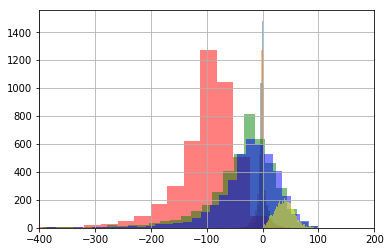

In [43]:
(((df_compare['vli2016']-df_compare['vli_16']).divide(df_compare['vli2016']))*100).hist(alpha=0.5,bins=binsize)
(((df_compare['li2016']-df_compare['li_16']).divide(df_compare['li2016']))*100).hist(alpha=0.5,bins=binsize)
(((df_compare['mi2016']-df_compare['mi_16']).divide(df_compare['mi2016']))*100).hist(alpha=0.5,bins=binsize, color='red')
(((df_compare['hmi2016']-df_compare['mhi_16']).divide(df_compare['hmi2016']))*100).hist(alpha=0.5, bins=400, color='green')
(((df_compare['hi2016']-df_compare['hi_16']).divide(df_compare['hi2016']+0.0001))*100).hist(alpha=0.5, bins=binsize, color='blue')
(((df_compare['vhi2016']-df_compare['vhi_16']).divide(df_compare['vhi2016']+0.0001))*100).hist(alpha=0.5, bins=binsize, color='yellow')
pl.xlim([-400,200])

## Dropping CT with population less than 500 (2016)

In [44]:
data = data[data['pop_16'] > 500]

### There are 6070 CT with population larger than 500 in 2016

In [45]:
len(data)

6056

## Dropping CT with more than 5 'Null' columns 

In [46]:
data = data[data.isnull().sum(axis=1) <= 5]
data.shape

(6056, 98)

----
## Calculating coefficient of variation of MOE
If any individual variable is missing, then the whole typology is missing.

**Tracts with a coefficient of variation > 20% on several key 2015 variables are flagged and determined unreliable:**
- Population -- V
- Housing units -- V
- Median rent -- V
- Median home value -- V
- Median income
- College count
- Renter count -- V

### Population

In [47]:
data = data[(data.pop_16_moe / 1.645 ) / data.pop_16 <= 0.3]

### Housing Units

In [48]:
data = data[(data.hu_16_moe / 1.645 ) / data.hu_16 <= 0.3]

In [49]:
data.shape

(6054, 98)

### Renter counts, Median rent, Median home value

In [50]:
data.columns

Index(['GEOid2', 'hh_00', 'hh_16', 'hh_16_moe', 'hh_90', 'hi_00', 'hi_16',
       'hi_16_moe', 'hi_90', 'hi_mig_10', 'hi_mig_10_moe', 'hi_mig_16',
       'hi_mig_16_moe', 'hinc_00', 'hinc_16', 'hinc_16_moe', 'hinc_90',
       'hu_00', 'hu_16', 'hu_16_moe', 'hu_90', 'li_00', 'li_16', 'li_16_moe',
       'li_90', 'li_mig_10', 'li_mig_10_moe', 'li_mig_16', 'li_mig_16_moe',
       'mhi_00', 'mhi_16', 'mhi_16_moe', 'mhi_90', 'mhi_mig_10',
       'mhi_mig_10_moe', 'mhi_mig_16', 'mhi_mig_16_moe', 'mhval_00',
       'mhval_16', 'mhval_16_moe', 'mhval_90', 'mi_00', 'mi_16', 'mi_16_moe',
       'mi_90', 'mi_mig_10', 'mi_mig_10_moe', 'mi_mig_16', 'mi_mig_16_moe',
       'mrent_00', 'mrent_16', 'mrent_16_moe', 'mrent_90', 'per_all_li_mig_10',
       'per_all_li_mig_16', 'per_col_00', 'per_col_16', 'per_col_16_moe',
       'per_col_90', 'per_nonwhite_00', 'per_nonwhite_16',
       'per_nonwhite_16_moe', 'per_nonwhite_90', 'per_owners_00',
       'per_owners_16', 'per_owners_16_moe', 'per_owners_90'

In [51]:
# dividing data to ct with majority of renters vs homeowners
datarent = data[data.per_rent_16 > 0.5]
dataowner = data[data.per_rent_16 <= 0.5]

# Renter count, ownership counts
datarent = datarent[(datarent.moe_renter16 / 1.645)  / datarent.rhu16 <= 0.3]
dataowner = dataowner[(dataowner.moe_owner16 / 1.645 ) / dataowner.ohu16 <= 0.3]

# Median rent, Median home value
datarent = datarent[(datarent.moe_mrent16 / 1.645)  / datarent.mrent16 <= 0.3]
dataowner = dataowner[(dataowner.moe_mhval16 / 1.645 ) / dataowner.mhval16 <= 0.3]

# concatenating two datasets back to 'data'
data = [dataowner, datarent]
data = pd.concat(data)
data.shape

### Median income -- no MOE in the data!

In [52]:
# ----

### Bachelors count

data = data[(data.moe_bachelors / 1.645 ) / data.bachelors <= 0.3]
data.shape

## 4,758 CT were found valid for the analysis -- 8.3% were dropped.

In [53]:
(5192-4758) / 5192

0.08359013867488443

### College count

In [54]:
# bachelors',
#  'moe_bachelors',
#  'masters',
#  'moe_masters',
#  'professional',
#  'moe_professionals',
#  'doctorate',
#  'moe_doctorates

(((data.moe_doctorates / 1.645 ) / data.doctorate) > 0.2).value_counts()

----
# _8 Typologies_ to be generated to the displacement map:
The typologies are:

### Low Income:
1. VLI - Highly Vulnerable >> _**an additional layer on top of assigned typologies**_
2. LI - Stable (Not Losing Low-Income Households)
3. LI - At Risk of Gentrification 
4. LI - Ongoing Gentrification 

### Moderate to High Income:
5. MHI - Advanced / Completed Gentrification
6. MHI - Stable (Not Losing Low-Income Households)
7. MHI - At Risk of Exclusion
8. MHI - Exclusion 

In [55]:
data.shape

(6054, 98)

In [56]:
print(data['pop_16'].mean())
print(data['pop_16'].std())

4174.174925668979
1864.2354117803561


# Create necessary variables:

## VLI - Very Low Income tract
- vhi2016

In [57]:
data.vhi_16.head()

0    0.066628
1    0.214115
2    0.049244
3    0.105358
4    0.050739
Name: vhi_16, dtype: float64

In [58]:
# Calculating median for vli and vli % of all hh in tract

median_vli = data['vli_16'].median()
print("the median of very low income and very low income households at the year 2016 from total households, "  
      "of all census tracts is:", median_vli)

the median of very low income and very low income households at the year 2016 from total households, of all census tracts is: 0.23643951062679655


In [59]:
# VLI tract (2016)

data['vli_tract16'] = np.where(data['vli_16'] > 0.5, 1, 0)
data['vli_tract16'].value_counts()

0    5616
1     438
Name: vli_tract16, dtype: int64

## Low Income tract
- calculate the median % of all tracts
- Binary output (0 == low income tract; 1 = not a low income tract)

In [60]:
data.iloc[:,61:63].head()

,per_nonwhite_16_moe,per_nonwhite_90
0,0.208673,0.0
1,0.102635,0.0
2,0.172449,0.0
3,0.173350,0.0
4,0.238221,0.0


In [61]:
data.columns

Index(['GEOid2', 'hh_00', 'hh_16', 'hh_16_moe', 'hh_90', 'hi_00', 'hi_16',
       'hi_16_moe', 'hi_90', 'hi_mig_10', 'hi_mig_10_moe', 'hi_mig_16',
       'hi_mig_16_moe', 'hinc_00', 'hinc_16', 'hinc_16_moe', 'hinc_90',
       'hu_00', 'hu_16', 'hu_16_moe', 'hu_90', 'li_00', 'li_16', 'li_16_moe',
       'li_90', 'li_mig_10', 'li_mig_10_moe', 'li_mig_16', 'li_mig_16_moe',
       'mhi_00', 'mhi_16', 'mhi_16_moe', 'mhi_90', 'mhi_mig_10',
       'mhi_mig_10_moe', 'mhi_mig_16', 'mhi_mig_16_moe', 'mhval_00',
       'mhval_16', 'mhval_16_moe', 'mhval_90', 'mi_00', 'mi_16', 'mi_16_moe',
       'mi_90', 'mi_mig_10', 'mi_mig_10_moe', 'mi_mig_16', 'mi_mig_16_moe',
       'mrent_00', 'mrent_16', 'mrent_16_moe', 'mrent_90', 'per_all_li_mig_10',
       'per_all_li_mig_16', 'per_col_00', 'per_col_16', 'per_col_16_moe',
       'per_col_90', 'per_nonwhite_00', 'per_nonwhite_16',
       'per_nonwhite_16_moe', 'per_nonwhite_90', 'per_owners_00',
       'per_owners_16', 'per_owners_16_moe', 'per_owners_90'

In [62]:
# Calculating median for li and vli % of all hh in tract

medianli = data['vli_16'].median() + data['li_16'].median()
print("the median of low income and very low income households at the year 2016 from total households, "  
      "of all census tracts is:", medianli)

the median of low income and very low income households at the year 2016 from total households, of all census tracts is: 0.3864030641219126


In [63]:
data['vli_16'].median()

0.23643951062679655

In [64]:
# 2016

data['li_tract16'] = np.where(data['vli_16'] + data['li_16'] > medianli, 1, 0)
data.iloc[:,-1:].head(10)

,li_tract16
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [65]:
data['li_tract16'].value_counts()

1    3205
0    2849
Name: li_tract16, dtype: int64

In [66]:
# 2000

data['li_tract00'] = np.where(data['vli_00']+data['li_00'] > (data['vli_00'].median() + data['li_00'].median()), 1, 0)
data.iloc[:,-2:].head(10)

,li_tract16,li_tract00
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [67]:
# 1990

data['li_tract90'] = np.where(data['vli_90']+data['li_90'] > (data['vli_90'].median() + data['li_90'].median()), 1, 0)
data.iloc[:,-3:].head(10)

,li_tract16,li_tract00,li_tract90
0,1,1,1
1,1,1,0
2,1,1,1
3,1,1,1
4,1,1,1
5,1,1,1
6,1,1,1
7,1,1,1
8,1,1,1
9,1,1,1


In [68]:
print('LI HH 2000:\n', data['li_tract00'].value_counts())
print('\nLI HH 1990:\n', data['li_tract90'].value_counts())

LI HH 2000:
 1    3170
0    2884
Name: li_tract00, dtype: int64

LI HH 1990:
 1    3209
0    2845
Name: li_tract90, dtype: int64


### Define % college educated < regional median 

In [69]:
data['per_col_00'].median()

0.1392909156391836

In [70]:
data['edulow90'] = np.where(data['per_col_90'] < data['per_col_90'].median(), 1, 0)
data['edulow00'] = np.where(data['per_col_00'] < data['per_col_00'].median(), 1, 0)
data.iloc[:,-4:].head(7)

,li_tract00,li_tract90,edulow90,edulow00
0,1,1,1,1
1,1,0,0,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
5,1,1,1,1
6,1,1,1,1


### Define % renters > regional median

In [71]:
data['per_rent_00'].median()

0.3794058649345687

In [72]:
data['renters%90'] = np.where(data['per_rent_90'] > data['per_rent_90'].median(), 1, 0)
data['renters%00'] = np.where(data['per_rent_00'] > data['per_rent_00'].median(), 1, 0)
data['renters%16'] = np.where(data['per_rent_16'] > data['per_rent_16'].median(), 1, 0)

data.iloc[:,-5:].head(7)

,edulow90,edulow00,renters%90,renters%00,renters%16
0,1,1,1,1,1
1,0,1,0,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1
5,1,1,1,1,1
6,1,1,1,1,1


### Define % nonwhite > regional median

In [73]:
data['per_nonwhite_00'].median()

0.1784075199092619

In [74]:
data['nonwhiteHigh90'] = np.where(data['per_nonwhite_90'] > data['per_nonwhite_90'].median(), 1, 0)
data['nonwhiteHigh00'] = np.where(data['per_nonwhite_00'] > data['per_nonwhite_00'].median(), 1, 0)
data['nonwhiteHigh16'] = np.where(data['per_nonwhite_16'] > data['per_nonwhite_16'].median(), 1, 0)
data.iloc[:,-5:].head(7)

,renters%00,renters%16,nonwhiteHigh90,nonwhiteHigh00,nonwhiteHigh16
0,1,1,0,1,1
1,1,1,0,1,1
2,1,1,0,1,1
3,1,1,0,1,1
4,1,1,0,1,1
5,1,1,0,1,1
6,1,1,0,1,1


### Define Severe Rent Burden 2016 -- DIDN"T WORK! CHECK AGAIN

In [75]:
data[data['mrent_16']/(data['hinc_16']/12)<0.3].head()

,GEOid2,hh_00,hh_16,hh_16_moe,hh_90,hi_00,hi_16,hi_16_moe,hi_90,hi_mig_10,...,li_tract00,li_tract90,edulow90,edulow00,renters%90,renters%00,renters%16,nonwhiteHigh90,nonwhiteHigh00,nonwhiteHigh16
9,34001001500,905.0,756.0,63.0,1100.0,0.028655,0.015003,0.019253,0.025767,0.015136,...,1,1,1,1,1,1,1,0,1,1
14,34001010101,1772.0,1447.0,126.0,1459.0,0.133645,0.149099,0.074351,0.193612,0.206348,...,0,0,0,0,0,0,0,0,0,0
15,34001010102,1211.0,960.0,90.0,1237.0,0.103413,0.104324,0.058704,0.120001,0.192526,...,1,1,0,1,0,0,0,0,0,0
16,34001010200,2062.0,2260.0,146.0,1942.0,0.164282,0.139873,0.065387,0.189860,0.159608,...,0,0,0,0,0,0,0,0,0,0
18,34001010401,1751.0,2081.0,155.0,1497.0,0.170828,0.143431,0.080781,0.187272,0.170152,...,0,0,0,1,0,0,0,1,0,0


# Vulnerability 1990 / 2000 // 3 out of 4 of the above for each year
- % low income households > regional median
- college educated < regional median
- renters > regional median
- nonwhite > regional median

In [76]:
# vulnerable 1990

def volnurable90(df):
    if df['li_tract90'] == 1 and df['edulow90'] == 1 and df['renters%90'] == 1:
        val = 1
    elif df['li_tract90'] == 1 and df['edulow90'] == 1 and df['nonwhiteHigh90'] == 1:
        val = 1
    elif df['li_tract90'] == 1 and df['renters%90'] == 1 and df['nonwhiteHigh90'] == 1:
        val = 1
    elif df['edulow90'] == 1 and df['renters%90'] == 1 and df['nonwhiteHigh90'] == 1:
        val = 1
    else:
        val = 0
    return val

In [77]:
data['Volnurable90'] = data.apply(volnurable90, axis=1)
data[10:16]

,GEOid2,hh_00,hh_16,hh_16_moe,hh_90,hi_00,hi_16,hi_16_moe,hi_90,hi_mig_10,...,li_tract90,edulow90,edulow00,renters%90,renters%00,renters%16,nonwhiteHigh90,nonwhiteHigh00,nonwhiteHigh16,Volnurable90
10,34001001900,913.0,721.0,81.0,1002.0,0.047908,0.089440,0.070990,0.068767,0.095786,...,1,1,1,1,1,1,0,1,1,1
11,34001002300,826.0,773.0,85.0,856.0,0.067975,0.060289,0.047136,0.045076,0.022238,...,1,1,1,1,1,1,0,1,1,1
12,34001002400,1243.0,1193.0,111.0,739.0,0.033088,0.027698,0.024044,0.000000,0.069968,...,1,1,1,1,1,1,0,1,1,1
13,34001002500,1987.0,1970.0,161.0,725.0,0.052247,0.048731,0.039410,0.013793,0.061518,...,1,1,1,1,1,1,0,1,1,1
14,34001010101,1772.0,1447.0,126.0,1459.0,0.133645,0.149099,0.074351,0.193612,0.206348,...,0,0,0,0,0,0,0,0,0,0
15,34001010102,1211.0,960.0,90.0,1237.0,0.103413,0.104324,0.058704,0.120001,0.192526,...,1,0,1,0,0,0,0,0,0,0


In [78]:
# Volnurable 2000

def volnurable00(df):
    if df['li_tract00'] == 1 and df['edulow00'] == 1 and df['renters%00'] == 1:
        val = 1
    elif df['li_tract00'] == 1 and df['edulow00'] == 1 and df['nonwhiteHigh00'] == 1:
        val = 1
    elif df['li_tract00'] == 1 and df['renters%00'] == 1 and df['nonwhiteHigh00'] == 1:
        val = 1
    elif df['edulow00'] == 1 and df['renters%00'] == 1 and df['nonwhiteHigh00'] == 1:
        val = 1
    else:
        val = 0
    return val

In [79]:
data['Volnurable00'] = data.apply(volnurable00, axis=1)
data[10:16]

,GEOid2,hh_00,hh_16,hh_16_moe,hh_90,hi_00,hi_16,hi_16_moe,hi_90,hi_mig_10,...,edulow90,edulow00,renters%90,renters%00,renters%16,nonwhiteHigh90,nonwhiteHigh00,nonwhiteHigh16,Volnurable90,Volnurable00
10,34001001900,913.0,721.0,81.0,1002.0,0.047908,0.089440,0.070990,0.068767,0.095786,...,1,1,1,1,1,0,1,1,1,1
11,34001002300,826.0,773.0,85.0,856.0,0.067975,0.060289,0.047136,0.045076,0.022238,...,1,1,1,1,1,0,1,1,1,1
12,34001002400,1243.0,1193.0,111.0,739.0,0.033088,0.027698,0.024044,0.000000,0.069968,...,1,1,1,1,1,0,1,1,1,1
13,34001002500,1987.0,1970.0,161.0,725.0,0.052247,0.048731,0.039410,0.013793,0.061518,...,1,1,1,1,1,0,1,1,1,1
14,34001010101,1772.0,1447.0,126.0,1459.0,0.133645,0.149099,0.074351,0.193612,0.206348,...,0,0,0,0,0,0,0,0,0,0
15,34001010102,1211.0,960.0,90.0,1237.0,0.103413,0.104324,0.058704,0.120001,0.192526,...,0,1,0,0,0,0,0,0,0,0


In [80]:
data['Volnurable90'].value_counts()

0    4093
1    1961
Name: Volnurable90, dtype: int64

In [81]:
data['Volnurable00'].value_counts()

0    3546
1    2508
Name: Volnurable00, dtype: int64

### 2123 census tracts were found Volnurable in 1990, while 2159 were found Volnurable in 2000

---

### Rail station (TOD)

In [82]:
len(data)

6054

In [83]:
len(df_aram)

5306

In [84]:
len(df_compare)

4211

In [85]:
ct=[]
for i in df_aram.GEOid2:
    flag=0
    for j in df_compare.GEOid2:
        if i == j:
            flag=1
            ct.append(1)
            break
    if flag==0:
        ct.append(0)

In [86]:
df_aram['contained']=ct

In [87]:
len(df_aram.columns)

86

In [88]:
len(df_aram)

5306

In [89]:
df_aram = df_aram.dropna(axis = 0, how = 'any')

In [90]:
len(df_aram)

4593

In [91]:
len(df_aram.columns)

86

In [92]:
len(data[(data['GEOid2']>8001021600) & (data['GEOid2']<33001020000)])

735

In [93]:
len(df_aram[(df_aram['GEOid2']>8001021600) & (df_aram['GEOid2']<33001020000)])

421

In [94]:
len(data[(data['GEOid2']>1001021600) & (data['GEOid2']<35001020000)])

2179

In [95]:
len(df_aram[(df_aram['GEOid2']>1001021600) & (df_aram['GEOid2']<35001020000)])

1864

In [96]:
len(data[(data['GEOid2']>35001021600)])

3875

In [97]:
len(df_aram[(df_aram['GEOid2']>3501021600)])

4593

In [98]:
df_aram[(df_aram['contained']==0)&(df_aram.GEOid2>35103190603)].head()

,GEOid2,hh16,moe_hh16,per_col00,per_nonwhite00,per_rent00,vli2000,li2000,mi2000,hmi2000,...,doctorate,moe_doctorates,per_col_16,pop90,per_col90,moe_hu16,hinc16,moe_hinc16,popgrowth,contained
1999,36005001900,962.0,47.0,0.038502,0.952883,0.779582,0.282579,0.191349,0.149400,0.092852,...,3.0,5.0,0.204986,1556.000000,0.031818,37.0,39130.0,3228.0,1069.0,0
2020,36005005001,1602.0,54.0,0.080584,0.987244,0.910483,0.399515,0.125601,0.078236,0.074425,...,0.0,16.0,0.117764,4634.706543,0.029230,27.0,27283.0,6922.0,310.0,0
2021,36005005002,1860.0,111.0,0.080584,0.987244,0.910483,0.399515,0.125601,0.078236,0.074425,...,0.0,16.0,0.078227,5584.293457,0.035219,60.0,28010.0,7413.0,-182.0,0
2031,36005006300,1839.0,101.0,0.067860,0.975408,0.926893,0.357957,0.120214,0.060864,0.072379,...,18.0,20.0,0.246628,5869.471191,0.176553,43.0,31926.0,5031.0,-1524.0,0
2043,36005007600,1596.0,84.0,0.124872,0.961852,0.798142,0.236354,0.155912,0.088635,0.113711,...,0.0,16.0,0.077768,4284.000000,0.203161,66.0,34778.0,5984.0,111.0,0


In [99]:
data[data.GEOid2>36005001500].head()

,GEOid2,hh_00,hh_16,hh_16_moe,hh_90,hi_00,hi_16,hi_16_moe,hi_90,hi_mig_10,...,edulow90,edulow00,renters%90,renters%00,renters%16,nonwhiteHigh90,nonwhiteHigh00,nonwhiteHigh16,Volnurable90,Volnurable00
1519,36005001600,1837.0,1970.0,73.0,1740.0,0.105069,0.128204,0.059109,0.115868,0.067464,...,1,1,1,1,1,0,1,1,0,1
1520,36005002000,3109.0,3008.0,136.0,2954.0,0.066110,0.041559,0.041727,0.100192,0.034523,...,1,1,1,1,1,0,1,1,1,1
1521,36005002300,1624.0,1960.0,72.0,1690.0,0.084830,0.041212,0.031476,0.075384,0.035817,...,1,1,1,1,1,0,1,1,1,1
1522,36005002500,1729.0,1817.0,102.0,1804.0,0.047089,0.056678,0.041296,0.060125,0.055547,...,1,1,1,1,1,0,1,1,1,1
1523,36005002702,1295.0,1436.0,62.0,1132.0,0.068404,0.050312,0.051769,0.029938,0.030363,...,1,1,1,1,1,0,1,1,1,1


In [100]:
df_ny_90[df_ny_90.GEOid2>36005001800].head()

,vli_90,li_90,mi_90,mhi_90,hi_90,vhi_90,per_col_90,per_rent_90,per_owners_90,per_nonwhite_90,hh_90,mrent_90,hinc_90,mhval_90,hu_90,pop_90,state,county,tract,GEOid2
86,0.397441,0.146268,0.127801,0.085457,0.100192,0.142840,0.043086,0.869712,0.130288,0.0,2954.0,298.0,14765.0,185400.0,2955.0,9110.0,36,5,2000,36005002000
87,0.576833,0.104262,0.116869,0.078001,0.075384,0.048651,0.030145,0.990981,0.009019,0.0,1690.0,186.0,7925.0,0.0,1774.0,4577.0,36,5,2300,36005002300
88,0.589194,0.119006,0.124845,0.065452,0.060125,0.041377,0.020984,0.975524,0.024476,0.0,1804.0,276.0,8246.0,87500.0,1716.0,5572.0,36,5,2500,36005002500
89,0.572817,0.089893,0.137253,0.047893,0.069228,0.082917,0.022631,1.000000,0.000000,0.0,1001.0,192.0,8128.0,0.0,904.0,3004.0,36,5,2701,36005002701
90,0.663262,0.120471,0.098431,0.054029,0.029938,0.033869,0.010953,0.979452,0.020548,0.0,1132.0,284.0,7140.0,0.0,1168.0,3930.0,36,5,2702,36005002702


In [101]:
df_ny_00[df_ny_00.GEOid2>36005001500].head()

,vli_00,li_00,mi_00,mhi_00,hi_00,vhi_00,per_col_00,per_rent_00,per_owners_00,per_nonwhite_00,...,mrent_00,hinc_00,mhval_00,hu_00,pop_00,NAME,state,county,tract,GEOid2
90,0.290700,0.157385,0.164295,0.093594,0.105069,0.188957,0.081406,0.844655,0.155345,0.667051,...,558.0,24552.0,186800.0,1796.0,5208.0,Census Tract 16,36,5,1600,36005001600
91,0.360628,0.121842,0.271059,0.063139,0.057960,0.125371,0.044061,0.870849,0.129151,0.741211,...,443.0,21283.0,178100.0,271.0,1024.0,Census Tract 17,36,5,1700,36005001700
92,0.473237,0.110749,0.147592,0.076283,0.066110,0.126029,0.045770,0.847231,0.152769,0.825074,...,266.0,14691.0,211500.0,3070.0,9101.0,Census Tract 20,36,5,2000,36005002000
93,0.483123,0.151444,0.132124,0.049700,0.084830,0.098779,0.042387,0.993961,0.006039,0.776771,...,229.0,14112.0,187500.0,1656.0,4305.0,Census Tract 23,36,5,2300,36005002300
94,0.506997,0.170981,0.141513,0.041535,0.047089,0.091885,0.028959,0.971014,0.028986,0.747700,...,340.0,12221.0,92400.0,1725.0,5109.0,Census Tract 25,36,5,2500,36005002500


In [102]:
df_ny_10[df_ny_10.GEOid2>36005001500].head()

,vli_mig_10,li_mig_10,mi_mig_10,mhi_mig_10,hi_mig_10,vhi_mig_10,vli_mig_10_moe,li_mig_10_moe,mi_mig_10_moe,mhi_mig_10_moe,hi_mig_10_moe,vhi_mig_10_moe,state,county,tract,per_all_li_mig_10,GEOid2
91,0.476297,0.161810,0.147167,0.086034,0.067464,0.061538,0.142988,0.069746,0.065673,0.040179,0.040380,0.053025,36,5,1600,0.638106,36005001600
92,0.435911,0.102929,0.150065,0.139682,0.070832,0.100904,0.191555,0.048462,0.061350,0.055164,0.055391,0.057313,36,5,1900,0.538840,36005001900
93,0.575514,0.182319,0.094793,0.070062,0.034523,0.042949,0.180140,0.075666,0.049459,0.041552,0.041712,0.040521,36,5,2000,0.757832,36005002000
94,0.579382,0.205637,0.124125,0.035103,0.035817,0.020098,0.206160,0.067056,0.054980,0.025173,0.025217,0.021590,36,5,2300,0.785020,36005002300
95,0.000000,0.000000,0.090416,0.246319,0.399790,0.265306,0.000000,0.000000,0.257939,0.702703,0.707900,0.766764,36,5,2400,0.000000,36005002400


In [103]:
df_ny_16[df_ny_16.GEOid2>36005001500].head()

,vli_16,li_16,mi_16,mhi_16,hi_16,vhi_16,vli_mig_16,li_mig_16,mi_mig_16,mhi_mig_16,...,state,county,tract,hh_16_moe,mrent_16_moe,hinc_16_moe,mhval_16_moe,hu_16_moe,pop_16_moe,GEOid2
88,0.303323,0.104233,0.201761,0.094281,0.128204,0.168198,0.476297,0.161810,0.147167,0.086034,...,36,5,1600,73.0,54.0,3554.0,24228.0,73.0,600.0,36005001600
89,0.253424,0.052650,0.196232,0.129688,0.102852,0.265155,0.435911,0.102929,0.150065,0.139682,...,36,5,1900,47.0,64.0,3228.0,40684.0,47.0,310.0,36005001900
90,0.463980,0.172038,0.157253,0.040911,0.041559,0.124259,0.575514,0.182319,0.094793,0.070062,...,36,5,2000,136.0,132.0,4611.0,26993.0,136.0,912.0,36005002000
91,0.492423,0.225821,0.106572,0.052592,0.041212,0.081381,0.579382,0.205637,0.124125,0.035103,...,36,5,2300,72.0,46.0,2328.0,-222222222.0,72.0,434.0,36005002300
92,0.409848,0.183600,0.147668,0.041393,0.056678,0.160814,0.490615,0.247891,0.115124,0.061570,...,36,5,2500,102.0,138.0,7282.0,129523.0,102.0,498.0,36005002500


In [104]:
df_ct_00[(df_ct_00['GEOid2']>9001021700) & (df_ct_00['GEOid2']<10001020000)].head()

,vli_00,li_00,mi_00,mhi_00,hi_00,vhi_00,per_col_00,per_rent_00,per_owners_00,per_nonwhite_00,...,mrent_00,hinc_00,mhval_00,hu_00,pop_00,NAME,state,county,tract,GEOid2
32,0.226723,0.239451,0.249839,0.104110,0.079595,0.100281,0.197674,0.342237,0.657763,0.266729,...,1143.0,58819.0,190700.0,1797.0,4274.0,Census Tract 218.01,9,1,21801,9001021801
33,0.371370,0.189639,0.169789,0.094886,0.093223,0.081092,0.112683,0.428430,0.571570,0.472708,...,886.0,45761.0,170700.0,2019.0,5606.0,Census Tract 218.02,9,1,21802,9001021802
34,0.182285,0.223408,0.263268,0.116357,0.109528,0.105154,0.246146,0.412865,0.587135,0.157875,...,1131.0,64468.0,247800.0,2192.0,5346.0,Census Tract 219,9,1,21900,9001021900
35,0.314983,0.255260,0.228574,0.109583,0.050523,0.041076,0.137610,0.489939,0.510061,0.375712,...,955.0,49704.0,140800.0,1143.0,2808.0,Census Tract 220,9,1,22000,9001022000
36,0.340826,0.161349,0.222889,0.100633,0.084686,0.089616,0.152619,0.636364,0.363636,0.370082,...,979.0,56224.0,244400.0,2541.0,6939.0,Census Tract 221,9,1,22100,9001022100


In [105]:
df_ct_90[(df_ct_90['GEOid2']>9001021600) & (df_ct_90['GEOid2']<10001020000)].head()

,vli_90,li_90,mi_90,mhi_90,hi_90,vhi_90,per_col_90,per_rent_90,per_owners_90,per_nonwhite_90,hh_90,mrent_90,hinc_90,mhval_90,hu_90,pop_90,state,county,tract,GEOid2
31,0.302130,0.210461,0.270668,0.106353,0.049491,0.060897,0.249105,0.718930,0.281070,0.0,2404.0,765.0,40753.0,232400.0,2430.0,4589.0,9,1,21700,9001021700
32,0.227955,0.221095,0.229505,0.118859,0.107582,0.095004,0.201259,0.366089,0.633911,0.0,3638.0,846.0,47247.0,213800.0,3633.0,9188.0,9,1,21800,9001021800
33,0.225688,0.218659,0.223330,0.122183,0.106200,0.103939,0.213493,0.378537,0.621463,0.0,2019.0,936.0,45823.0,233100.0,2050.0,4951.0,9,1,21900,9001021900
34,0.318185,0.259479,0.226878,0.077105,0.083014,0.035339,0.126333,0.502279,0.497721,0.0,1107.0,747.0,36370.0,169900.0,1097.0,2767.0,9,1,22000,9001022000
35,0.334426,0.202030,0.173376,0.102310,0.105551,0.082306,0.134402,0.633820,0.366180,0.0,2344.0,769.0,39853.0,218300.0,2395.0,5724.0,9,1,22100,9001022100


In [106]:
df_ct_00[(df_ct_00['GEOid2']>9001021600) & (df_ct_00['GEOid2']<10001020000)].head()

,vli_00,li_00,mi_00,mhi_00,hi_00,vhi_00,per_col_00,per_rent_00,per_owners_00,per_nonwhite_00,...,mrent_00,hinc_00,mhval_00,hu_00,pop_00,NAME,state,county,tract,GEOid2
31,0.367914,0.196199,0.161833,0.102796,0.100635,0.070623,0.243469,0.756468,0.243532,0.416430,...,1061.0,47311.0,141000.0,3092.0,5977.0,Census Tract 217,9,1,21700,9001021700
32,0.226723,0.239451,0.249839,0.104110,0.079595,0.100281,0.197674,0.342237,0.657763,0.266729,...,1143.0,58819.0,190700.0,1797.0,4274.0,Census Tract 218.01,9,1,21801,9001021801
33,0.371370,0.189639,0.169789,0.094886,0.093223,0.081092,0.112683,0.428430,0.571570,0.472708,...,886.0,45761.0,170700.0,2019.0,5606.0,Census Tract 218.02,9,1,21802,9001021802
34,0.182285,0.223408,0.263268,0.116357,0.109528,0.105154,0.246146,0.412865,0.587135,0.157875,...,1131.0,64468.0,247800.0,2192.0,5346.0,Census Tract 219,9,1,21900,9001021900
35,0.314983,0.255260,0.228574,0.109583,0.050523,0.041076,0.137610,0.489939,0.510061,0.375712,...,955.0,49704.0,140800.0,1143.0,2808.0,Census Tract 220,9,1,22000,9001022000


In [107]:
df_ct_10[(df_ct_10['GEOid2']>9001021600) & (df_ct_10['GEOid2']<10001020000)].head()

,vli_mig_10,li_mig_10,mi_mig_10,mhi_mig_10,vli_mig_10_moe,li_mig_10_moe,mi_mig_10_moe,mhi_mig_10_moe,state,county,tract,per_all_li_mig_10,GEOid2
31,0.465414,0.237172,0.297414,0.0,0.199384,0.113825,0.080145,0.0,9,1,21700,0.702586,9001021700
32,0.598134,0.186500,0.215366,0.0,0.256312,0.096303,0.063256,0.0,9,1,21801,0.784634,9001021801
33,0.681031,0.143699,0.175270,0.0,0.248909,0.062165,0.060820,0.0,9,1,21802,0.824730,9001021802
34,0.711597,0.157939,0.130464,0.0,0.298746,0.099617,0.056260,0.0,9,1,21900,0.869536,9001021900
35,0.749774,0.137523,0.112703,0.0,0.359140,0.085314,0.066272,0.0,9,1,22000,0.887297,9001022000


In [108]:
df_ct_16[(df_ct_16['GEOid2']>9001021600) & (df_ct_16['GEOid2']<10001020000)].head()

,vli_16,li_16,mi_16,mhi_16,hi_16,vhi_16,vli_mig_16,li_mig_16,mi_mig_16,mhi_mig_16,...,state,county,tract,hh_16_moe,mrent_16_moe,hinc_16_moe,mhval_16_moe,hu_16_moe,pop_16_moe,GEOid2
31,0.299932,0.171984,0.175893,0.110733,0.129729,0.111730,0.465414,0.237172,0.297414,0.0,...,9,1,21700,210.0,235.0,13223.0,46146.0,210.0,630.0,9001021700
32,0.365044,0.191842,0.189652,0.067070,0.057251,0.129141,0.598134,0.186500,0.215366,0.0,...,9,1,21801,100.0,114.0,11714.0,19921.0,100.0,395.0,9001021801
33,0.470141,0.175839,0.137747,0.078631,0.046039,0.091603,0.681031,0.143699,0.175270,0.0,...,9,1,21802,108.0,229.0,11973.0,26016.0,108.0,417.0,9001021802
34,0.400049,0.240065,0.141233,0.067471,0.080999,0.070183,0.711597,0.157939,0.130464,0.0,...,9,1,21900,105.0,277.0,8185.0,44938.0,105.0,740.0,9001021900
35,0.444695,0.180830,0.199771,0.050394,0.082411,0.041899,0.749774,0.137523,0.112703,0.0,...,9,1,22000,78.0,129.0,9641.0,69656.0,78.0,370.0,9001022000


In [109]:
df_compare.GEOid2[0]==df_aram.GEOid2[0]

True

data['TOD'].value_counts()

## Define % of units in pre-1950 buildings > regional median

In [110]:
data['units_pre50_High'] = np.where(data['per_units_pre50'] > data['per_units_pre50'].median(), 1, 0)
data.iloc[:,-3:].head(7)

,Volnurable90,Volnurable00,units_pre50_High
0,1,1,1
1,0,1,1
2,1,1,1
3,1,1,1
4,1,1,1
5,1,1,1
6,1,1,0


## Define Employment density (2015) > regional median

In [111]:
data['empdens14_High'] = np.where(data['empd15'] > data['empd15'].median(), 1, 0)
data.iloc[:,-3:].head(7)

,Volnurable00,units_pre50_High,empdens14_High
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,1
4,1,1,0
5,1,1,0
6,1,0,1


## Define rent change 00-16 and home value change 00-16 > regional median

In [112]:
data['mrent90_00'] = data['mrent_00'] - data['mrent_90']

In [113]:
data['mrent00_16'] = data['mrent_16'] - data['mrent_00']

In [114]:
data['mhval90_00'] = data['mhval_00'] - data['mhval_90']

In [115]:
data['mhval00_16'] = data['mhval_16'] - data['mhval_00']

In [116]:
# 1990 base
data['rentchange_High90'] = np.where(data['mrent90_00'] > data['mrent90_00'].median(), 1, 0)
data['rhomeValchange_High90'] = np.where(data['mhval90_00'] > data['mhval90_00'].median(), 1, 0)

# 2000 base
data['rentchange_High00'] = np.where(data['mrent00_16'] > data['mrent00_16'].median(), 1, 0)
data['rhomeValchange_High00'] = np.where(data['mhval00_16'] > data['mhval00_16'].median(), 1, 0)

data.iloc[:,-5:].head(7)

,mhval00_16,rentchange_High90,rhomeValchange_High90,rentchange_High00,rhomeValchange_High00
0,95300.0,0,0,0,0
1,104500.0,0,0,0,0
2,81000.0,1,1,0,0
3,76200.0,0,0,0,0
4,80400.0,0,0,0,0
5,166200.0,0,0,0,1
6,89900.0,1,1,0,0


## Define "Hot Market"
one out of two options of changing market (rent / home value)

In [117]:
def hotmarket90(df):
    if df['rentchange_High90'] == 1 or df['rhomeValchange_High90'] == 1 and df['rentchange_High90'] == 1:
        val = 1
    else:
        val = 0
    return val

In [118]:
def hotmarket00(df):
    if df['rentchange_High00'] == 1 or df['rhomeValchange_High00'] == 1 and df['rentchange_High00'] == 1:
        val = 1
    else:
        val = 0
    return val

In [119]:
data['hotmarket90'] = data.apply(hotmarket90, axis=1)
data['hotmarket00'] = data.apply(hotmarket00, axis=1)
data.iloc[:,-6:].head(7)

,rentchange_High90,rhomeValchange_High90,rentchange_High00,rhomeValchange_High00,hotmarket90,hotmarket00
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,1,0,0,1,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,1,0,0
6,1,1,0,0,1,0


## Define risk0
2 out of the 4 of the following is true in 2016 (select only one 'hot market' from the 2 'hot market' option)
- Has rail station in tract
- % of units in pre-1950 buildings > regional median
- Employment density (2014)> regional median
- “Hot market”

In [120]:
# risk 1990

def risk90(df):
    if df['TOD'] == 1 and df['units_pre50_High'] == 1 and df['empdens14_High'] == 1:
        val = 1
    elif df['TOD'] == 1 and df['units_pre50_High'] == 1 and df['hotmarket90'] == 1:
        val = 1
    elif df['TOD'] == 1 and df['empdens14_High'] == 1 and df['hotmarket90'] == 1:
        val = 1
    elif df['units_pre50_High'] == 1 and df['empdens14_High'] == 1 and df['hotmarket90'] == 1:
        val = 1
    else:
        val = 0
    return val

In [121]:
# risk 2000

def risk00(df):
    if df['TOD'] == 1 and df['units_pre50_High'] == 1 and df['empdens14_High'] == 1:
        val = 1
    elif df['TOD'] == 1 and df['units_pre50_High'] == 1 and df['hotmarket00'] == 1:
        val = 1
    elif df['TOD'] == 1 and df['empdens14_High'] == 1 and df['hotmarket00'] == 1:
        val = 1
    elif df['units_pre50_High'] == 1 and df['empdens14_High'] == 1 and df['hotmarket00'] == 1:
        val = 1
    else:
        val = 0
    return val

In [122]:
df_aram['TOD']

0       0.0
3       0.0
5       0.0
6       0.0
7       1.0
8       0.0
9       1.0
10      0.0
11      1.0
14      0.0
15      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      1.0
25      1.0
26      0.0
27      0.0
28      0.0
29      0.0
30      0.0
31      0.0
32      0.0
33      1.0
34      0.0
35      0.0
36      1.0
       ... 
5270    0.0
5271    0.0
5272    0.0
5273    0.0
5274    1.0
5275    0.0
5276    1.0
5277    0.0
5278    0.0
5279    0.0
5280    0.0
5281    0.0
5282    1.0
5283    0.0
5284    0.0
5285    0.0
5286    0.0
5287    0.0
5288    0.0
5289    0.0
5290    0.0
5291    0.0
5292    0.0
5293    0.0
5295    0.0
5296    0.0
5297    0.0
5298    0.0
5299    0.0
5300    1.0
Name: TOD, Length: 4593, dtype: float64

In [123]:
data['risk90'] = data.apply(risk90, axis=1)
data['risk90'].value_counts()

0    4577
1    1477
Name: risk90, dtype: int64

In [124]:
data['risk00'] = data.apply(risk00, axis=1)
data['risk00'].value_counts()

0    4586
1    1468
Name: risk00, dtype: int64

In [125]:
# create a df with only low income tracts

df_LI = data[data['li_tract16'] == 1]
df_LI.shape

(3205, 126)

### There are 2760 LI tracts in the NY region in 2016

## recalculating popgrowth 90-00; 00-16

In [126]:
# recalculating popgrowth 90-00; 00-16
data['popgrowth90-00'] = data['pop_00'] - data['pop_90']
data['popgrowth00-16'] = data['pop_16'] - data['pop_00']

data.iloc[:,-3:].head(3)

,risk00,popgrowth90-00,popgrowth00-16
0,0,231.0,141.0
1,0,628.0,-165.0
2,0,842.0,789.0


## Define Population stable or growing 1990-2000; 2000-2016  ( >= 0 )

In [127]:
data['pgrowth90-00_High'] = np.where(data['popgrowth90-00'] >= 0, 1, 0)
data['pgrowth00-16_High'] = np.where(data['popgrowth00-16'] >= 0, 1, 0)
data.iloc[:,-4:].head()

,popgrowth90-00,popgrowth00-16,pgrowth90-00_High,pgrowth00-16_High
0,231.0,141.0,1,1
1,628.0,-165.0,1,0
2,842.0,789.0,1,1
3,788.0,-197.0,1,0
4,565.0,440.0,1,1


## Define Loss of LI households 1990-2000; 2000-2016 (absolute loss)
- ch_all_li_count90_00 < 0
- ch_all_li_count00_16 < 0

In [128]:
data['ch_all_li_count90_00'] = data['vli_00'] + data['li_00'] - data['vli_90'] - data['li_90']

In [129]:
data['ch_all_li_count00_16'] = data['vli_16'] + data['li_16'] - data['vli_00'] - data['li_00']

In [130]:
data['lossLI90-00'] = np.where(data['ch_all_li_count90_00'] < 0, 1, 0)
data['lossLI00-16'] = np.where(data['ch_all_li_count00_16'] < 0, 1, 0)

data.iloc[:,-3:].head()

,ch_all_li_count00_16,lossLI90-00,lossLI00-16
0,0.072775,0,0
1,0.089685,0,0
2,0.119947,1,0
3,0.185062,1,0
4,0.160070,1,0


## Define LI migration rate in 2015 < in 2009

per_limove09 > per_limove16

In [131]:
np.sort(df_aram.columns)

array(['GEOid2', 'TOD', 'ag25up', 'all_li_count00', 'all_li_count16',
       'all_li_count90', 'bachelors', 'ch_all_li_count00_16',
       'ch_all_li_count90_00', 'co_med_indinc16', 'contained',
       'denominator', 'doctorate', 'empd15', 'hh00', 'hh16', 'hi1990',
       'hi2000', 'hi2016', 'hinc16', 'hmi1990', 'hmi2000', 'hmi2016',
       'hu16', 'li1990', 'li2000', 'li2016', 'masters', 'mhval00',
       'mhval00_16', 'mhval16', 'mhval90', 'mhval90_00', 'mi1990',
       'mi2000', 'mi2016', 'moe_bachelors', 'moe_doctorates', 'moe_hh16',
       'moe_hinc16', 'moe_hu16', 'moe_masters', 'moe_mhval16',
       'moe_mrent16', 'moe_owner16', 'moe_pop16', 'moe_professionals',
       'moe_renter16', 'moveinincd16', 'mrent00', 'mrent00_16', 'mrent16',
       'mrent90', 'mrent90_00', 'ohu00', 'ohu16', 'ohu90', 'per_all_li00',
       'per_all_li16', 'per_all_li90', 'per_col00', 'per_col90',
       'per_col_16', 'per_limove09', 'per_limove16', 'per_nonwhite00',
       'per_nonwhite16', 'per_nonwhi

In [132]:
data['moveinLI_decrease00'] = np.where(data['per_all_li_mig_16'] < data['per_all_li_mig_10'], 1, 0)
data.iloc[:,-3:].head()

,lossLI90-00,lossLI00-16,moveinLI_decrease00
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,1,0,0


## Change in college educators % 90-00, 00-16

In [133]:
data['edu_change90-00'] = data['per_col_00'] - data['per_col_90']
data['edu_change00-16'] = data['per_col_16'] - data['per_col_00']

data.iloc[:,-3:].head()

,moveinLI_decrease00,edu_change90-00,edu_change00-16
0,0,0.025183,0.501151
1,0,-0.081431,0.630765
2,0,0.044678,0.530168
3,0,0.050213,0.614020
4,0,-0.003440,0.535628


## Define Educated growth > region median

In [134]:
data['edugrowth_High90'] = np.where(data['edu_change90-00'] > data['edu_change90-00'].median(), 1, 0)
data['edugrowth_High00'] = np.where(data['edu_change00-16'] > data['edu_change00-16'].median(), 1, 0)

data.iloc[:,-3:].head()

,edu_change00-16,edugrowth_High90,edugrowth_High00
0,0.501151,1,0
1,0.630765,0,1
2,0.530168,1,0
3,0.614020,1,1
4,0.535628,0,0


## Define Growth in real median household income (percent change) > regional median (90 and 00)

In [135]:
np.sort(list(data.columns))

array(['GEOid2', 'TOD', 'Volnurable00', 'Volnurable90',
       'ch_all_li_count00_16', 'ch_all_li_count90_00', 'edu_change00-16',
       'edu_change90-00', 'edugrowth_High00', 'edugrowth_High90',
       'edulow00', 'edulow90', 'empd15', 'empdens14_High', 'hh_00',
       'hh_16', 'hh_16_moe', 'hh_90', 'hi_00', 'hi_16', 'hi_16_moe',
       'hi_90', 'hi_mig_10', 'hi_mig_10_moe', 'hi_mig_16',
       'hi_mig_16_moe', 'hinc_00', 'hinc_16', 'hinc_16_moe', 'hinc_90',
       'hotmarket00', 'hotmarket90', 'hu_00', 'hu_16', 'hu_16_moe',
       'hu_90', 'li_00', 'li_16', 'li_16_moe', 'li_90', 'li_mig_10',
       'li_mig_10_moe', 'li_mig_16', 'li_mig_16_moe', 'li_tract00',
       'li_tract16', 'li_tract90', 'lossLI00-16', 'lossLI90-00', 'mhi_00',
       'mhi_16', 'mhi_16_moe', 'mhi_90', 'mhi_mig_10', 'mhi_mig_10_moe',
       'mhi_mig_16', 'mhi_mig_16_moe', 'mhval00_16', 'mhval90_00',
       'mhval_00', 'mhval_16', 'mhval_16_moe', 'mhval_90', 'mi_00',
       'mi_16', 'mi_16_moe', 'mi_90', 'mi_mig_10

In [136]:
data['pct_ch_hinc90_00'] = data['hinc_00'] - data['hinc_90']

In [137]:
data['pct_ch_hinc00_16'] = data['hinc_16'] - data['hinc_00']

In [138]:
data['hhIncomeGrowthHigh90'] = np.where(data['pct_ch_hinc90_00'] > data['pct_ch_hinc90_00'].median(), 1, 0)
data['hhIncomeGrowthHigh00'] = np.where(data['pct_ch_hinc00_16'] > data['pct_ch_hinc00_16'].median(), 1, 0)

data.iloc[:,-4:].head()

,pct_ch_hinc90_00,pct_ch_hinc00_16,hhIncomeGrowthHigh90,hhIncomeGrowthHigh00
0,225.0,3029.0,0,0
1,3538.0,3118.0,0,0
2,12997.0,-288.0,1,0
3,10050.0,-10801.0,0,0
4,10685.0,-1982.0,0,0


## Define  Demographic change 90-00, 00-16 (2 out of 3 factors)

In [139]:
# Demographic change 90-00

def Dchange90(df):
    if df['edugrowth_High90'] == 1 and df['hhIncomeGrowthHigh90'] == 1:
        val = 1
    elif df['edugrowth_High90'] == 1 and df['lossLI90-00'] == 1:
        val = 1
    elif df['hhIncomeGrowthHigh90'] == 1 and df['lossLI90-00'] == 1:
        val = 1
    else:
        val = 0
    return val

In [140]:
# Demographic change 00-16

def Dchange00(df):
    if df['edugrowth_High00'] == 1 and df['hhIncomeGrowthHigh00'] == 1:
        val = 1
    elif df['edugrowth_High00'] == 1 and df['lossLI00-16'] == 1:
        val = 1
    elif df['hhIncomeGrowthHigh00'] == 1 and df['lossLI00-16'] == 1:
        val = 1
    else:
        val = 0
    return val

In [141]:
data['Dchange90'] = data.apply(Dchange90, axis=1)
data['Dchange00'] = data.apply(Dchange00, axis=1)

data.iloc[:,-3:].head()

,hhIncomeGrowthHigh00,Dchange90,Dchange00
0,0,0,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,0,0


# Gentrified 90 + Gentrified 00

In [142]:
data['Gentrified90'] = np.where((data['Volnurable90'] == 1) & (data['Dchange90'] == 1) &
                                (data['hotmarket90'] == 1), 1, 0)
data['Gentrified00'] = np.where((data['Volnurable00'] == 1) & (data['Dchange00'] == 1) &
                                (data['hotmarket00'] == 1) & (data['moveinLI_decrease00'] == 1), 1, 0)

data.iloc[10:16,-3:]

,Dchange00,Gentrified90,Gentrified00
10,0,0,0
11,0,0,0
12,0,0,0
13,0,1,0
14,1,0,0
15,1,0,0


In [143]:
data.iloc[:,-44:].columns

Index(['edulow00', 'renters%90', 'renters%00', 'renters%16', 'nonwhiteHigh90',
       'nonwhiteHigh00', 'nonwhiteHigh16', 'Volnurable90', 'Volnurable00',
       'units_pre50_High', 'empdens14_High', 'mrent90_00', 'mrent00_16',
       'mhval90_00', 'mhval00_16', 'rentchange_High90',
       'rhomeValchange_High90', 'rentchange_High00', 'rhomeValchange_High00',
       'hotmarket90', 'hotmarket00', 'risk90', 'risk00', 'popgrowth90-00',
       'popgrowth00-16', 'pgrowth90-00_High', 'pgrowth00-16_High',
       'ch_all_li_count90_00', 'ch_all_li_count00_16', 'lossLI90-00',
       'lossLI00-16', 'moveinLI_decrease00', 'edu_change90-00',
       'edu_change00-16', 'edugrowth_High90', 'edugrowth_High00',
       'pct_ch_hinc90_00', 'pct_ch_hinc00_16', 'hhIncomeGrowthHigh90',
       'hhIncomeGrowthHigh00', 'Dchange90', 'Dchange00', 'Gentrified90',
       'Gentrified00'],
      dtype='object')

---

# Assign typologies to census tracts

----
# 1. _VLI - Highly Vulnerable_

In [144]:
data['VLI'] = np.where((data['vli_tract16'] == 1) & (data['renters%16'] == 1), 1, 0) 
data['VLI'].value_counts()

0    5622
1     432
Name: VLI, dtype: int64

# _5. MHI - Advanced / Completed Gentrification_
    - Pop in 2000>500
    - Moderate to High Income Tract in 2015
    - Gentrified in in 1990-2000 or 2000-2015 (Defined in Appendix)

In [145]:
# Advanced Gentrification (Moderate to High Income)

def AdvancedGen(df):
    if df['li_tract16'] == 0 and df['Gentrified90'] == 1 and df['VLI'] == 0:
        val = 1
    elif df['li_tract16'] == 0 and df['Gentrified00'] == 1 and df['VLI'] == 0:
        val = 1
    else:
        val = 0
    return val

In [146]:
data['AdvancedGen'] = data.apply(AdvancedGen, axis=1)
data['AdvancedGen'].value_counts()

0    5959
1      95
Name: AdvancedGen, dtype: int64

# _4. LI - Ongoing Gentrification_

    - Pop in 2000 > 500
    - Low Income Tract in 2016
    - Vulnerable in 2000 (Defined in Appendix)
    - Population stable or growing 2000-2016
    - Loss of LI households 2000-2016 (absolute loss)
    - Either:
        o “Hot market” (Defined in Appendix)
        o LI migration rate (percent of all migration to tract that was LI)
    in 2016 < in 2009
    - Gentrified in 1990-2000 or 2000-2016 (Defined in Appendix)

In [147]:
# Displacement of LowIncome Households/Ongoing Gentrification (Low Income)

def OngoingGenLI(df):
    # gentrified in 90, LI tract in 2015
    if df['li_tract16'] == 1 and df['Gentrified90'] == 1 and df['AdvancedGen'] == 0:
        val = 1
    # gentrified in 00, LI tract in 2015
    elif df['li_tract16'] == 1 and df['Gentrified00'] == 1 and df['AdvancedGen'] == 0:
        val = 1
    # LI tract in 2016; Vulnerable in 2000; pop growth; Loss of LI households; hot market in 90
    elif df['li_tract16'] == 1 and df['Volnurable00'] == 1 and df['popgrowth00-16'] == 1\
        and df['lossLI00-16'] == 1  and df['hotmarket90'] == 1 and df['AdvancedGen'] == 0:
        val = 1
    # LI tract in 2016; Vulnerable in 2000; pop growth; Loss of LI households; hot market in 00
    elif df['li_tract16'] == 1 and df['Volnurable00'] == 1 and df['popgrowth00-16'] == 1\
        and df['lossLI00-16'] == 1 and df['hotmarket00'] == 1 and df['AdvancedGen'] == 0:
        val = 1
    #     # LI tract in 2016; Vulnerable in 2000; pop growth; Loss of LI households; LI migration rate
    elif df['li_tract16'] == 1 and df['Volnurable00'] == 1 and df['popgrowth00-16'] == 1\
        and df['lossLI00-16'] == 1 and df['moveinLI_decrease00'] == 1 and df['AdvancedGen'] == 0:
        val = 1
    else:
        val = 0
    return val

In [148]:
data['OngoingGenLI'] = data.apply(OngoingGenLI, axis=1)
data['OngoingGenLI'].value_counts()

0    5805
1     249
Name: OngoingGenLI, dtype: int64

# _3. LI - At Risk of Gentrification _
    - Volnurable in 2000 (3 out of 4 variables)
    - Not currently undergoing displacement or ongoing gentrification
    - 2 out of the 4 of the following is true in 2015( select only one 'hot market' from the 2 'hot market' option)
    - Not currently undergoing displacement or ongoing gentrification

In [149]:
data['AtRiskGen'] = np.where((data['li_tract16'] == 1) & (data['Volnurable00'] == 1) &
                            (data['risk00'] == 1) & (data['OngoingGenLI'] == 0), 1, 0)

data['AtRiskGen'].value_counts()

0    5485
1     569
Name: AtRiskGen, dtype: int64

# 2. _LI - Stable (Not losing LI hh)_
   -  _'pop00'_ (>500)
   - Low Income tract in 2015
   - Not classified as At Risk of, Ongoing, or Advanced Gentrification

In [150]:
data['NotloseLI'] = np.where((data['li_tract16'] == 1) & (data['AtRiskGen'] == 0) &
                             (data['OngoingGenLI'] == 0) & (data['AdvancedGen'] == 0), 1, 0)

data['NotloseLI'].value_counts()

0    3667
1    2387
Name: NotloseLI, dtype: int64

---

# _8. MHI - Exclusion_
    - Pop in 2000 > 500
    - Moderate to High Income Tract in 2015
    - <20% LI in 2000 
    - % LI in 2016 < % LI in 2000
    - LI migration < regional median in 2015

In [151]:
data['LI<20%'] = np.where(data['li_16']+data['vli_16'] < 0.2, 1, 0)
data['%LIdecrease'] = np.where(data['li_16'] < data['li_00'], 1, 0)
data['migLI_low'] = np.where(data['per_all_li_mig_16'] < data['per_all_li_mig_10'].median(), 1, 0)

data.iloc[:,-3:].head(4)

,LI<20%,%LIdecrease,migLI_low
0,0,1,0
1,0,0,0
2,0,1,0
3,0,1,0


In [152]:
# Advanced Exclusion

def Exclusion(df):
    if df['li_tract16'] == 0 and df['LI<20%'] == 1 and df['%LIdecrease'] == 1 and df['migLI_low'] == 1:
        val = 1
    else:
        val = 0
    return val

In [153]:
data['Exclusion'] = data.apply(Exclusion, axis=1)
data['Exclusion'].value_counts()

0    5777
1     277
Name: Exclusion, dtype: int64

# _7. MHI - At Risk of Exclusion_

    - Pop in 2000 > 500
    - Moderate to High Income Tract in 2015
    - 2 out of the 4 of the following is true in 2015:
        o Has rail station in tract
        o % of units in prewar buildings (1950) > regional median
        o Employment density> regional median
        o “Hot market” (options defined below table)
    - Not currently undergoing exclusion – none of the below classifications are met

In [154]:
data['AtRiskExc'] = np.where((data['li_tract16'] == 0) & (data['risk00'] == 1) &
                            (data['Exclusion'] == 0), 1, 0)

data['AtRiskExc'].value_counts()

0    5486
1     568
Name: AtRiskExc, dtype: int64

# _6. MHI - Stable (Not Losing Low-Income Households)_
    - Pop in 2000>500
    - Moderate to High Income Tract in 2015
    - Not classified as At Risk of, Ongoing, or Advanced Exclusion

In [155]:
data['NotloseHigh'] = np.where((data['li_tract16'] == 0) & (data['AtRiskExc'] == 0) &
                            (data['Exclusion'] == 0), 1, 0)

data['NotloseHigh'].value_counts()

0    4050
1    2004
Name: NotloseHigh, dtype: int64

#  << TYPOLOGY >>

In [156]:
# Advanced Gentrification (Moderate to High Income)

def Typology(df):
    if df['VLI'] == 1:
        val = 'VLI - Highly Vulnerable for Displacement'
    elif df['AdvancedGen'] == 1:
        val = 'MHI - Advanced Gentrification'
    elif df['Exclusion'] == 1:
        val = 'MHI - Exclusion' 
    elif df['AtRiskExc'] == 1:
        val = 'MHI - At Risk of Exclusion'
    elif df['NotloseHigh'] == 1:
        val = 'MHI - Stable, Not Losing Low Income Households'
    elif df['OngoingGenLI'] == 1:
        val = 'LI - Ongoing Gentrification and/or Displacement'
    elif df['AtRiskGen'] == 1:
        val = 'LI - At Risk of Gentrification and/or Displacement'
    elif df['NotloseLI'] == 1:
        val = 'LI - Stable, Not Losing Low Income Households'
    else:
        val = 0
    return val

In [157]:
data['Typology'] = data.apply(Typology, axis=1)
data['Typology'].value_counts()

LI - Stable, Not Losing Low Income Households         2041
MHI - Stable, Not Losing Low Income Households        1963
MHI - At Risk of Exclusion                             519
LI - At Risk of Gentrification and/or Displacement     502
VLI - Highly Vulnerable for Displacement               432
MHI - Exclusion                                        272
LI - Ongoing Gentrification and/or Displacement        230
MHI - Advanced Gentrification                           95
Name: Typology, dtype: int64

In [158]:
len(pd.DataFrame(data['Typology']))#.value_counts()))

6054

In [159]:
resultsTyp = pd.DataFrame(data['Typology'].value_counts())
resultsTyp.columns = ['tractCounts']
resultsTyp['Typology%'] = resultsTyp['tractCounts'] / resultsTyp['tractCounts'].sum() *100

resultsTyp

,tractCounts,Typology%
"LI - Stable, Not Losing Low Income Households",2041,33.713247
"MHI - Stable, Not Losing Low Income Households",1963,32.424843
MHI - At Risk of Exclusion,519,8.572844
LI - At Risk of Gentrification and/or Displacement,502,8.292038
VLI - Highly Vulnerable for Displacement,432,7.135778
MHI - Exclusion,272,4.492897
LI - Ongoing Gentrification and/or Displacement,230,3.799141
MHI - Advanced Gentrification,95,1.569210


In [160]:
resultsTyp.dtypes

tractCounts      int64
Typology%      float64
dtype: object

In [161]:
data.shape

(6054, 159)

In [162]:
data[['GEOid2', 'Typology']].set_index('GEOid2').reset_index()

,GEOid2,Typology
0,34001000100,"LI - Stable, Not Losing Low Income Households"
1,34001000200,"LI - Stable, Not Losing Low Income Households"
2,34001000300,LI - Ongoing Gentrification and/or Displacement
3,34001000400,VLI - Highly Vulnerable for Displacement
4,34001000500,"LI - Stable, Not Losing Low Income Households"
5,34001001100,VLI - Highly Vulnerable for Displacement
6,34001001200,VLI - Highly Vulnerable for Displacement
7,34001001300,"LI - Stable, Not Losing Low Income Households"
8,34001001400,VLI - Highly Vulnerable for Displacement
9,34001001500,VLI - Highly Vulnerable for Displacement


In [163]:
data[['GEOid2', 'Typology']].set_index('GEOid2').to_csv('UDPNY_revisedTypologies2.csv')

([<matplotlib.patches.Wedge at 0x1a1d725278>,
 [Text(0.538591,0.959124,''),
  Text(-1.09999,0.0051373,''),
  Text(-0.311897,-1.05486,''),
  Text(0.263972,-1.06786,''),
  Text(0.73111,-0.821875,''),
  Text(0.97648,-0.506446,''),
  Text(1.07398,-0.237851,''),
  Text(1.09866,-0.054206,'')])

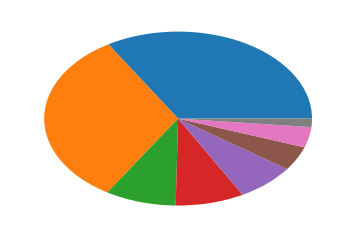

In [164]:
pl.pie(resultsTyp.iloc[:,1])

In [165]:
df_aram.TOD

0       0.0
3       0.0
5       0.0
6       0.0
7       1.0
8       0.0
9       1.0
10      0.0
11      1.0
14      0.0
15      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      1.0
25      1.0
26      0.0
27      0.0
28      0.0
29      0.0
30      0.0
31      0.0
32      0.0
33      1.0
34      0.0
35      0.0
36      1.0
       ... 
5270    0.0
5271    0.0
5272    0.0
5273    0.0
5274    1.0
5275    0.0
5276    1.0
5277    0.0
5278    0.0
5279    0.0
5280    0.0
5281    0.0
5282    1.0
5283    0.0
5284    0.0
5285    0.0
5286    0.0
5287    0.0
5288    0.0
5289    0.0
5290    0.0
5291    0.0
5292    0.0
5293    0.0
5295    0.0
5296    0.0
5297    0.0
5298    0.0
5299    0.0
5300    1.0
Name: TOD, Length: 4593, dtype: float64